In [25]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd

A partir del siguiente sistema de ecuaciones que representan el modelo DA-OA

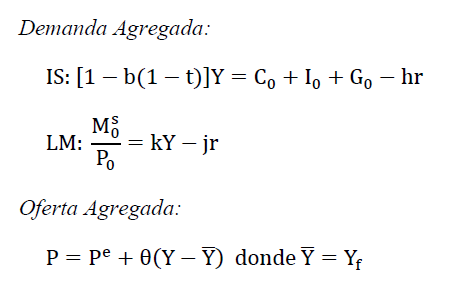

Ecuaciones de Ingreso (Ye) , tasa de interés (Re) , (Pe) de equilibrio

Ecuación IS

                Bo   B1
            r = —— - —— Y
                 h    h

Ecuación LM

                  1   Mso   k
            r = - —— ———— + —— Y
                  j   P     j



                     hMso
            P = ——————————————
                -jBo+(jB1+hk)Y



                 jBo        hMso     1
            Y = —————— + (————————) ———
                jB1+hk     jB1+hk    P



            Mso - P = kY- jr



                hMso+jBo   jB1+hk
            P = ———————— - —————— Y
                   h         h


Ecuación de Oferta Agregada (P)

            P = Pe + θ(Y − Ȳ)

Si Oferta Agregada = Demanda Agregada

                            hMso+jBo   jB1+hk 
            Pe + θ(Y − Ȳ) = ———————— - —————— Y
                               h         h


                  hMso+jBo                 jB1+hk
            Ye = (———————— - Pe+θȲ) / (θ - ——————)
                     h                       h


            Y = P - Pe - θȲ
                ———————————
                    θ
                    
                  hMso+jBo   jB1+hk   P - Pe - θȲ
            Pe = (———————— - ——————) (———————————)
                     h         h           θ

Grafique del equilibrio simultáneo en el modelo DA-OA.

In [26]:
#1--------------------------
    # Demanda Agregada
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada
    
# Parámetros

Y_size = 100

Pe = 100 
θ = 3
_Y = 20   

Y = np.arange(Y_size)


# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

In [27]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas (x,y)
A = [P_AD[0], Y[0]] # DA, coordenada inicio
B = [P_AD[-1], Y[-1]] # DA, coordenada fin

C = [P_AS[0], Y[0]] # L_45, coordenada inicio
D = [P_AS[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(192.39043824701196, 50.79681274900399)

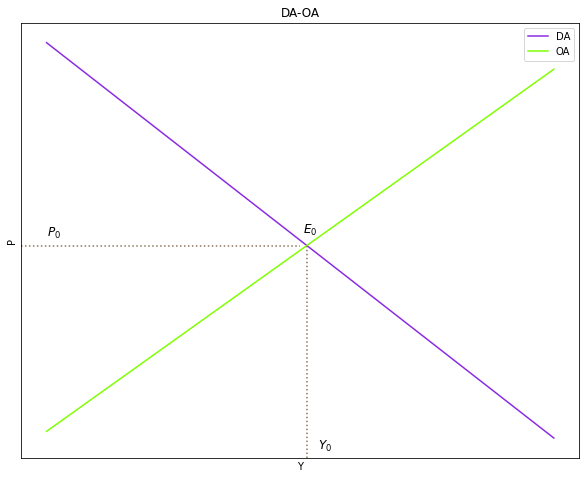

In [28]:
# Gráfico del modelo DA-OA

# Dimensiones del gráfico
y_max = np.max(P)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar 
ax.plot(Y, P_AD, label = "DA", color = "#8A2BE2") #DA
ax.plot(Y, P_AS, label = "OA", color = "#7FFF00") #OA

# Líneas punteadas
plt.axhline(y=intersec[0], xmin= 0, xmax= 0.5, linestyle = ":", color = "#8B7355")
plt.axvline(x=intersec[1],  ymin= 0, ymax= 0.49, linestyle = ":", color = "#8B7355")

# Texto agregado
plt.text(0, 200, '$P_0$', fontsize = 12, color = 'black')
plt.text(53, 25, '$Y_0$', fontsize = 12, color = 'black')
plt.text(50, 202, '$E_0$', fontsize = 12, color = 'black')


# Eliminar valores de ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title="DA-OA", xlabel= r'Y', ylabel= r'P')
ax.legend()

plt.show()

Analice los efectos sobre las variables endógenas Y, P y r de una disminución del gasto fiscal (Go < 0). 

 Si Go↓ → DA↓ → DA<Y → Y↓


Y↓ → [Pe+O (Y-Ȳ)]↓ → [Pe+O (Y-Ȳ)]< P → P↓

In [29]:
# nombrar variables como símbolos de IS
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos de LM 
k, j, Ms, P, Y = symbols('k j Ms P Y')

# nombrar variables como símbolos para curva de ofert a agregada
Pe, _Y, Y, θ = symbols('Pe, _Y, Y, θ')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio en el modelo DA-OA
Y_eq = ( (1)/(θ + ( (j*beta_1+h*k)/h) ) )*( ( (h*Ms+j*beta_0)/h ) - Pe + θ*_Y )

# Precio de equilibrio en el modelo DA-OA 
P_eq = Pe + θ*(Y_eq - _Y)

# Tasa de interés de equilibrio en el modelo DA-OA
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms - P_eq)
#((h*Ms+j*beta_0)/h) - ((j*beta_1+h*r)/h)*((P-Pe-θ*_Y)/θ)

In [30]:
df_Y_eq_Go = diff(Y_eq, Go)
print("El Diferencial del Producto con respecto al diferencial del gasto fiscal = ", df_Y_eq_Go)
print("\n")

El Diferencial del Producto con respecto al diferencial del gasto fiscal =  j/(h*(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h))




                                ΔY                                j
                                ——— = ————————————————————————————————————————————
                                ΔGo   (h*(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h))

                                ΔY
                                ——— = (+)
                                (-)

                                ΔY = (-)

In [31]:
df_r_eq_Go = diff(r_eq, Go)
print("El Diferencial de la tasa de interés con respecto al diferencial del gasto fiscal = ", df_r_eq_Go)
print("\n")

El Diferencial de la tasa de interés con respecto al diferencial del gasto fiscal =  -j*θ/((θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)*(h*k + j*(-(1 - t)*(b - m) + 1))) + j/(h*k + j*(-(1 - t)*(b - m) + 1))




 Δr                                                             -j*θ
  ——— = ———————————————————————————————————————————————————————————————————————————————————————————————————————————————
  ΔGo   ((θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)*(h*k + j*(-(1 - t)*(b - m) + 1))) + j/(h*k + j*(-(1 - t)*(b - m) + 1))

  Δr    (-)
  ——— = ———
  (-)   (+)

  Δr = (+)

In [33]:
df_P_eq_Go = diff(P_eq, Go)
print("El Diferencial del nivel de precios con respecto al diferencial del gasto fiscal = ", df_P_eq_Go)

El Diferencial del nivel de precios con respecto al diferencial del gasto fiscal =  j*θ/(h*(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h))


        ΔPe                      j*θ
        ——— = —————————————————————————————————————————————
        ΔGo    (h*(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h))

        ΔPe
        ——— = (+)
        (-)

        ΔPe = (-)

<function matplotlib.pyplot.show(close=None, block=None)>

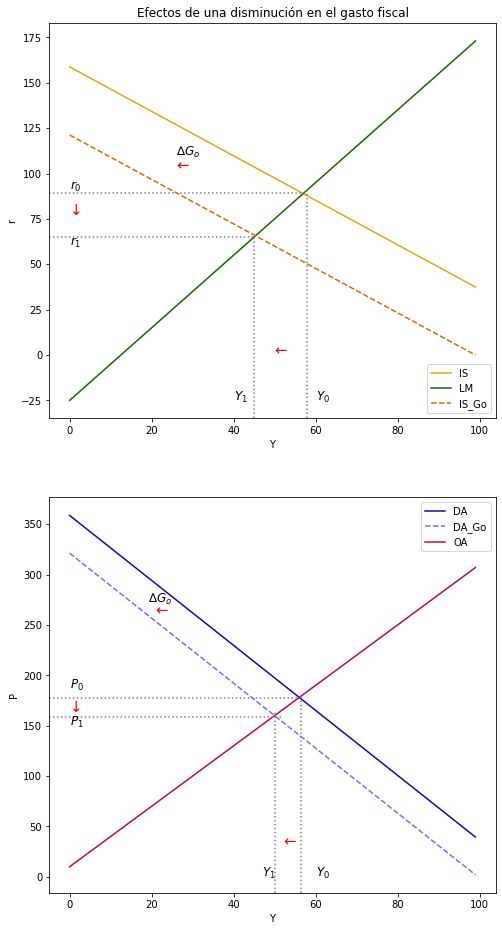

In [35]:
# IS-LM

#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

#--------------------------------------------------
    # NUEVA curva IS: reducción Gasto fiscal (Go)
    
# Definir SOLO el parámetro cambiado
Go = 20

# Generar la ecuación con el nuevo parámetro
def r_IS_G(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS_G(b, m, t, Co, Io, Go, Xo, h, Y)

#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 8           

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)


#1--------------------------
    # Demanda Agregada ORGINAL
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)

#--------------------------------------------------
    # NUEVA Demanda Agregada

# Definir SOLO el parámetro cambiado

Go = 20

# Generar la ecuación con el nuevo parámetro

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD_Go(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_Go = P_AD_Go(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada ORIGINAL
    
# Parámetros

Y_size = 100

Pe = 70
θ = 3
_Y = 20  

Y = np.arange(Y_size)

# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

# Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # Gráfico 1: IS-LM
    
ax1.plot(Y, r, label = "IS", color = "#dbad04") #IS
ax1.plot(Y, i, label="LM", color = "#196300")  #LM
ax1.plot(Y, r_G, label="IS_Go", color = "#cf6c04", linestyle ='dashed')  #IS_Modificado

ax1.axvline(x=45,  ymin= 0, ymax= 0.46, linestyle = ":", color = "grey")
ax1.axvline(x=58,  ymin= 0, ymax= 0.58, linestyle = ":", color = "grey")
ax1.axhline(y=65,  xmin= 0, xmax= 0.46, linestyle = ":", color = "grey")
ax1.axhline(y=89.5,  xmin= 0, xmax= 0.57, linestyle = ":", color = "grey")

ax1.text(26, 110, '∆$G_o$', fontsize=12, color='black')
ax1.text(26, 102, '←', fontsize=15, color='red')
ax1.text(50, 0, '←', fontsize=15, color='red')
ax1.text(0, 77, '↓', fontsize=15, color='red')
ax1.text(60, -25, '$Y_0$', fontsize=12, color='black')
ax1.text(40, -25, '$Y_1$', fontsize=12, color='black')
ax1.text(0, 91, '$r_0$', fontsize=12, color='black')
ax1.text(0, 60, '$r_1$', fontsize=12, color='black')


ax1.set(title="Efectos de una disminución en el gasto fiscal", xlabel= r'Y', ylabel= r'r')
ax1.legend()

# Gráfico 2: DA-OA

ax2.plot(Y, P_AD, label = "DA", color = "#1502bf") #DA
ax2.plot(Y, P_Go, label = "DA_Go", color = "#796cf0", linestyle = 'dashed') #DA_Go
ax2.plot(Y, P_AS, label = "OA", color = "#c70254") #OA

ax2.axvline(x=50,  ymin= 0, ymax= 0.46, linestyle = ":", color = "grey")
ax2.axvline(x=56.5,  ymin= 0, ymax= 0.5, linestyle = ":", color = "grey")
ax2.axhline(y=159,  xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")
ax2.axhline(y=178,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax2.text(52, 30, '←', fontsize=15, color='red')
ax2.text(21, 260, '←', fontsize=15, color='red')
ax2.text(19, 272, '∆$G_o$', fontsize=12, color='black')
ax2.text(0, 164, '↓', fontsize=15, color='red')

ax2.text(60, 0, '$Y_0$', fontsize=12, color='black')
ax2.text(47, 0, '$Y_1$', fontsize=12, color='black')
ax2.text(0, 187, '$P_0$', fontsize=12, color='black')
ax2.text(0, 150, '$P_1$', fontsize=12, color='black')

ax2.set(xlabel= r'Y', ylabel= r'P')
ax2.legend()

plt.show

In [36]:
Efectos sobre las variables endógenas Y, P y r de una disminución de la masa monetaria (Ms < 0)

SyntaxError: invalid syntax (1403389475.py, line 1)

    Modelo IS-LM:                               Si   Go↓ → DA↓ → DA<Y → Y↓

                                                    r↑ → I↓ → DA↓ → DA<Y → Y↓ 

     Modelo DA-OA:                              Si    Y↓ → O(Y-Ȳ)↓ → P↓    

In [37]:
# nombrar variables como símbolos de IS
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos de LM 
k, j, Ms, P, Y = symbols('k j Ms P Y')

# nombrar variables como símbolos para curva de oferta agregada
Pe, _Y, Y, θ = symbols('Pe, _Y, Y, θ')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio en el modelo DA-OA
Y_eq = ( (1)/(θ + ( (j*beta_1+h*k)/h) ) )*( ( (h*Ms+j*beta_0)/h ) - Pe + θ*_Y )

# Precio de equilibrio en el modelo DA-OA 
P_eq = Pe + θ*(Y_eq - _Y)

# Tasa de interés de equilibrio en el modelo DA-OA
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms - P_eq)
#((h*Ms+j*beta_0)/h) - ((j*beta_1+h*r)/h)*((P-Pe-θ*_Y)/θ)

In [38]:
df_Y_eq_Ms = diff(Y_eq, Ms)
print("El Diferencial del Producto con respecto al diferencial de la masa monetaria = ", df_Y_eq_Ms)
print("\n")


El Diferencial del Producto con respecto al diferencial de la masa monetaria =  1/(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)




     ΔY                       1
    ——— = ———————————————————————————————————————————
    ΔMs     (θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)


    ΔY
    ——— = (+)
    (-)

    ΔY = (-)
    

In [39]:
df_r_eq_Ms = diff(r_eq, Ms)
print("El Diferencial de la tasa de interés con respecto al diferencial de la masa monetaria = ", df_r_eq_Ms)
print("\n")

El Diferencial de la tasa de interés con respecto al diferencial de la masa monetaria =  h*(-θ/(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h) + 1)/(h*k + j*(-(1 - t)*(b - m) + 1))




    ΔY                       1
    ——— = ———————————————————————————————————————————
    ΔMs     (θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)


    ΔY
    ——— = (+)
    (-)

    ΔY = (-)

In [40]:
df_P_eq_Ms = diff(P_eq, Ms)
print("El Diferencial del nivel de precios con respecto al diferencial de la masa monetaria = ", df_P_eq_Ms)

El Diferencial del nivel de precios con respecto al diferencial de la masa monetaria =  θ/(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)


    ΔPe                      θ
    ——— = —————————————————————————————————————————————
    ΔMs     (θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)

    ΔPe
    ——— = (+)
    (-)

    ΔPe= (-)

Grafico

<function matplotlib.pyplot.show(close=None, block=None)>

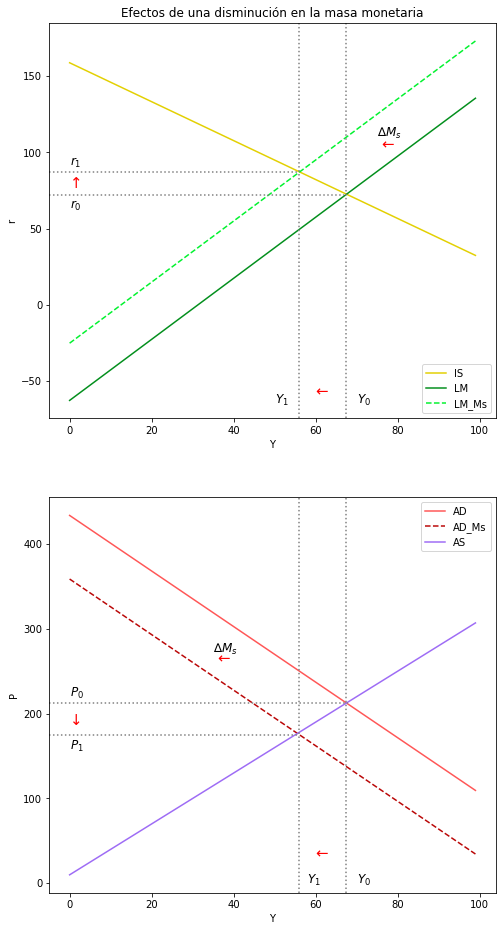

In [51]:
# IS-LM

#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 500             
P  = 8           

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM: disminución en la Masa Monetaria (Ms)

# Definir SOLO el parámetro cambiado
Ms = 200

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

#DA-OA

#1--------------------------
    # Demanda Agregada ORGINAL
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 275            
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)

#--------------------------------------------------
    # NUEVA Demanda Agregada

# Definir SOLO el parámetro cambiado

Ms = 200

# Generar la ecuación con el nuevo parámetro

def P_AD_Ms(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_Ms = P_AD_Ms(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada ORIGINAL
    
# Parámetros

Y_size = 100

Pe = 70
θ = 3
_Y = 20  

Y = np.arange(Y_size)

# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

# Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # Gráfico 1: IS-LM
    
ax1.plot(Y, r, label = "IS", color = "#e3d002") #IS
ax1.plot(Y, i, label="LM", color = "#038f1d")  #LM
ax1.plot(Y, i_Ms, label="LM_Ms", color = "#02f22f", linestyle ='dashed')  #LM

ax1.axvline(x=67.5,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axvline(x=56,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axhline(y=72,  xmin= 0, xmax= 0.66, linestyle = ":", color = "grey")
ax1.axhline(y=87,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax1.text(75, 110, '∆$M_s$', fontsize=12, color='black')
ax1.text(76, 102, '←', fontsize=15, color='red')
ax1.text(60, -60, '←', fontsize=15, color='red')
ax1.text(0, 77, '↑', fontsize=15, color='red')
ax1.text(70, -65, '$Y_0$', fontsize=12, color='black')
ax1.text(50, -65, '$Y_1$', fontsize=12, color='black')
ax1.text(0, 63, '$r_0$', fontsize=12, color='black')
ax1.text(0, 91, '$r_1$', fontsize=12, color='black')


ax1.set(title="Efectos de una disminución en la masa monetaria", xlabel= r'Y', ylabel= r'r')
ax1.legend()


#---------------------------------
    # Gráfico 2: DA-OA

ax2.plot(Y, P_AD, label = "AD", color = "#ff5757") #DA
ax2.plot(Y, P_Ms, label = "AD_Ms", color = "#ba0707", linestyle = 'dashed') #DA_Ms
ax2.plot(Y, P_AS, label = "AS", color = "#9e6cf5") #OA

ax2.axvline(x=67.5,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=56,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axhline(y=213,  xmin= 0, xmax= 0.67, linestyle = ":", color = "grey")
ax2.axhline(y=175,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax2.text(60, 30, '←', fontsize=15, color='red')
ax2.text(36, 260, '←', fontsize=15, color='red')
ax2.text(35, 272, '∆$M_s$', fontsize=12, color='black')
ax2.text(0, 187, '↓', fontsize=15, color='red')

ax2.text(70, 0, '$Y_0$', fontsize=12, color='black')
ax2.text(58, 0, '$Y_1$', fontsize=12, color='black')
ax2.text(0, 220, '$P_0$', fontsize=12, color='black')
ax2.text(0, 158, '$P_1$', fontsize=12, color='black')

ax2.set(xlabel= r'Y', ylabel= r'P')
ax2.legend()

plt.show

efectos sobre las variables endógenas Y, P y r de un incremento de la tasa de impuestos (t>0)

Si  𝑡↑→𝑘↑→𝐷𝐴↓→𝐷𝐴<𝑌→𝑌↓

𝑌↓→ [𝑃𝑒+𝑂(𝑌−Ȳ)]↓→ [𝑃𝑒+𝑂(𝑌−Ȳ)]< P → P↓

In [52]:
# nombrar variables como símbolos de IS
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos de LM 
k, j, Ms, P, Y = symbols('k j Ms P Y')

# nombrar variables como símbolos para curva de oferta agregada
Pe, _Y, Y, θ = symbols('Pe, _Y, Y, θ')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio en el modelo DA-OA
Y_eq = ( (1)/(θ + ( (j*beta_1+h*k)/h) ) )*( ( (h*Ms+j*beta_0)/h ) - Pe + θ*_Y )

# Precio de equilibrio en el modelo DA-OA 
P_eq = Pe + θ*(Y_eq - _Y)

# Tasa de interés de equilibrio en el modelo DA-OA
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms - P_eq)
#((h*Ms+j*beta_0)/h) - ((j*beta_1+h*r)/h)*((P-Pe-θ*_Y)/θ)

In [53]:
# Efecto del cambio de Precio esperado sobre Tasa de Interés en el modelo DA-OA
df_Y_eq_t = diff(Y_eq, t)
print("El Diferencial del Producto con respecto al diferencial de la masa monetaria = ", df_Y_eq_t)
print("\n")

El Diferencial del Producto con respecto al diferencial de la masa monetaria =  -j*(b - m)*(-Pe + _Y*θ + (Ms*h + j*(Co + Go + Io + Xo))/h)/(h*(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)**2)




 ΔY      -j*(b - m)*(-Pe + _Y*θ + (Ms*h + j*(Co + Go + Io + Xo))/h)
——— =  ———————————————————————————————————————————————————————————
 Δt       (h*(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)**2)     

 ΔY
——— = (-)
 (+)

 ΔY= (-)

In [54]:
# Efecto del cambio de tasa de impuestos sobre Tasa de Interés en el modelo DA-OA
df_r_eq_t = diff(r_eq, t)
print("El Diferencial de la tasa de interés con respecto al diferencial de la masa monetaria = ", df_r_eq_t)
print("\n")

El Diferencial de la tasa de interés con respecto al diferencial de la masa monetaria =  -h*j*(b - m)*(Ms - Pe - θ*(-_Y + (-Pe + _Y*θ + (Ms*h + j*(Co + Go + Io + Xo))/h)/(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)))/(h*k + j*(-(1 - t)*(b - m) + 1))**2 - j**2*(b - m)*(Co + Go + Io + Xo)/(h*k + j*(-(1 - t)*(b - m) + 1))**2 + j*θ*(b - m)*(-Pe + _Y*θ + (Ms*h + j*(Co + Go + Io + Xo))/h)/((θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)**2*(h*k + j*(-(1 - t)*(b - m) + 1)))




 Δr
 ——— = (-)
 (+)

Δr= (-)

In [55]:
# Efecto del cambio de Precio esperado sobre Tasa de Interés en el modelo DA-OA
df_P_eq_t = diff(P_eq, t)
print("El Diferencial del nivel de precios con respecto al diferencial de la masa monetaria = ", df_P_eq_t)

El Diferencial del nivel de precios con respecto al diferencial de la masa monetaria =  -j*θ*(b - m)*(-Pe + _Y*θ + (Ms*h + j*(Co + Go + Io + Xo))/h)/(h*(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)**2)


ΔPe    -j*θ*(b - m)*(-Pe + _Y*θ + (Ms*h + j*(Co + Go + Io + Xo))/h)
——— = ——————————————————————————————————————————————————————————————
Δt     (h*(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)**2)

ΔPe
——— = (-)
(+)

ΔPe = (-)


Grafico

In [56]:
# IS-LM

#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.01

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros
Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 8           

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
# NUEVA curva IS: incremento en la tasa de impuestos (t)

# Definir SOLO el parámetro cambiado
t = 3.6

# Generar la ecuación con el nuevo parámetro
def r_IS_t(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_t= r_IS_t(b, m, t, Co, Io, Go, Xo, h, Y)


In [57]:
#DA-OA

#1--------------------------
    # Demanda Agregada ORIGINAL
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.01

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)

# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)

#----------------------------------------
 # NUEVA Demanda Agregada

# Definir SOLO el parámetro cambiado

t = 6.8

# Generar la ecuación con el nuevo parámetro
B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD_t(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_t= P_AD_t(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada ORIGINAL
    
# Parámetros

Y_size = 100

Pe = 59
θ = 3
_Y = 20  

Y = np.arange(Y_size)

# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

<function matplotlib.pyplot.show(close=None, block=None)>

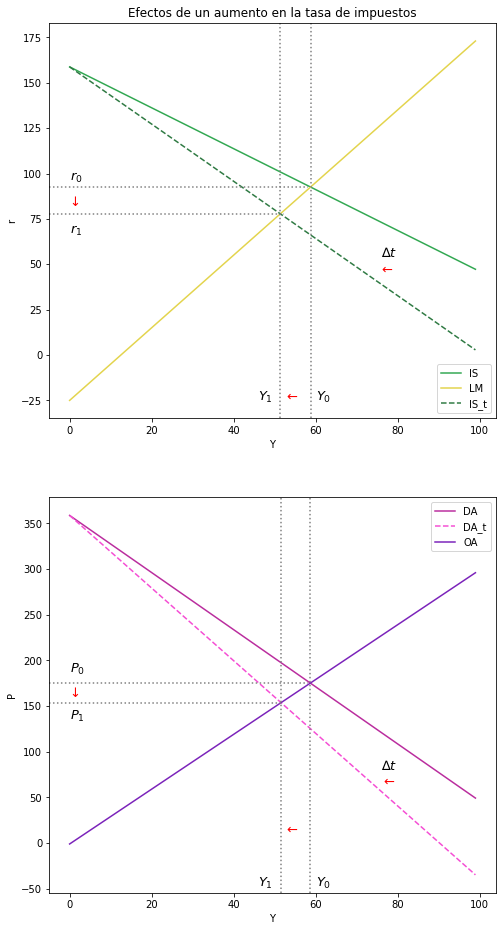

In [58]:
# Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
# Gráfico 1: IS-LM
    
ax1.plot(Y, r, label = "IS", color = "#32a852") #IS
ax1.plot(Y, i, label="LM", color = "#e3d44d")  #LM
ax1.plot(Y, r_t, label="IS_t", color = "#2f7a43", linestyle ='dashed')  #IS_t

ax1.axvline(x=58.78,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axvline(x=51.40,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axhline(y=92.60,  xmin= 0, xmax= 0.58, linestyle = ":", color = "grey")
ax1.axhline(y=77.80,  xmin= 0, xmax= 0.525, linestyle = ":", color = "grey")

ax1.text(76, 54, '∆$t$', fontsize=13, color='black')
ax1.text(76, 45, '←', fontsize=13, color='red')
ax1.text(53, -25, '←', fontsize=13, color='red')
ax1.text(0, 82, '↓', fontsize=13, color='red')
ax1.text(60, -25, '$Y_0$', fontsize=13, color='black')
ax1.text(46, -25, '$Y_1$', fontsize=13, color='black')
ax1.text(0, 96, '$r_0$', fontsize=13, color='black')
ax1.text(0, 67, '$r_1$', fontsize=13, color='black')

ax1.set(title="Efectos de un aumento en la tasa de impuestos", xlabel='Y', ylabel='r')
ax1.legend()
#---------------------------------
# Gráfico 2: DA-OA

ax2.plot(Y, P_AD, label = "DA", color = "#ba2d9e") #DA
ax2.plot(Y, P_t, label = "DA_t", color = "#f54ed4", linestyle = 'dashed') #DA_t
ax2.plot(Y, P_AS, label = "OA", color = "#7b23ba") #OA

ax2.axvline(x=58.72,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=51.57,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axhline(y=175.68,  xmin= 0, xmax= 0.58, linestyle = ":", color = "grey")
ax2.axhline(y=153.74,  xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

ax2.text(53, 10, '←', fontsize=13, color='red')
ax2.text(76.5, 63, '←', fontsize=13, color='red')
ax2.text(0, 160, '↓', fontsize=13, color='red')
ax2.text(76, 80, '∆$t$', fontsize=13, color='black')
ax2.text(60, -48, '$Y_0$', fontsize=13, color='black')
ax2.text(46, -48, '$Y_1$', fontsize=13, color='black')
ax2.text(0, 187, '$P_0$', fontsize=13, color='black')
ax2.text(0, 135, '$P_1$', fontsize=13, color='black')

ax2.set(xlabel='Y', ylabel='P')
ax2.legend()

plt.show